**Task 1**

In [1]:
#importing drive module from google.colab package
from google.colab import drive

#mounting drive at a specific location in google colab
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing os module
import os

#setting current directory path
os.chdir("/content/drive/MyDrive")

In [3]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

****1)Read and Understand the Data****

*   Load the dataset `Bank_Personal_Loan_Modelling.csv` and display the first few rows.

*   Review the data attributes using df.head(), df.describe()



In [20]:
#(a)Load the dataset `Bank_Personal_Loan_Modelling.csv` and display the first few rows.
#Reading input csv file as pandas dataframe
bank_loan_model_df = pd.read_csv("/content/drive/MyDrive/Bank_Personal_Loan_Modelling-1.csv")

In [21]:
#(b)Review the data attributes using df.head()
bank_loan_model_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [22]:
#(b)Review the data attributes using df.describe()
bank_loan_model_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [23]:
#Displaing number of elements in each dimension using shape
bank_loan_model_df.shape

(5000, 14)

In [24]:
#Information about the data
bank_loan_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


****2)Data Preprocessing****

*   Handle missing values (check if any, decide how to impute)

*   Encode categorical variables (check if any, using one hot encoding)

*   Transform variables if needed (e.g., binning to convert continuous variable to categorical).






In [25]:
#(a)Handle missing values (check if any, decide how to impute using mean, median or mode)

#Checked for missing values and there are no missing values found in the data set
bank_loan_model_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
#Dropping irrelevent columns
bank_loan_model_df.drop(["ID","ZIP Code"],axis = 1,inplace=True)
bank_loan_model_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [27]:
#(b)Encode categorical variables (check if any, using one hot encoding)

# Apply one hot encoding
one_hot_encoder = OneHotEncoder(drop = None,sparse=False, dtype=int)

#Fit and transform the 'Education' column needed for training data
education_encoded = one_hot_encoder.fit_transform(bank_loan_model_df[['Education']])

# Get the column names for the one-hot encoded variables
education_columns = one_hot_encoder.get_feature_names_out(['Education'])

# Create a DataFrame with the encoded data
education_encoded_df = pd.DataFrame(education_encoded, columns=education_columns)

# Drop the original 'Education' column and concatenate the new encoded columns
df_encoded = pd.concat([bank_loan_model_df.drop(columns=['Education']), education_encoded_df], axis=1)

# Display the encoded DataFrame
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [ ]:
#SVM is scale sensitive. Here, scaling is performed to avoid few features with larger magnitude dominating other features.Also to scale all features to same level.
# This includes continuous variables like
#["Age","Experience","Income","CCAvg","Mortgage","Family"] that could have different scales. However, categorical variables that have been one-hot encoded do not need scaling,
# as they are already binary (0 or 1).

In [28]:
#(c)Transform variables if needed (e.g., binning to convert continuous variable to categorical).

#Scaling

df_scaled = df_encoded.copy()

#Identify columns to scale
continuous_features = ["Age","Experience","Income","CCAvg","Mortgage","Family"]

#Apply scaling only to the numerical features

#Fit and Transform needed for training data

scaler = StandardScaler()
df_scaled[continuous_features] = scaler.fit_transform(df_scaled[continuous_features])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-0.555524,0,1,0,0,0,1,0,0
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-0.555524,0,1,0,0,0,1,0,0
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-0.555524,0,0,0,0,0,1,0,0
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,-0.555524,0,0,0,0,0,0,1,0
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,-0.555524,0,0,0,0,1,0,1,0


In [29]:
#Rearranging target column in dataframe

# Function to move 'Personal Loan' column to the end
def move_personal_loan_to_end(df):
    personal_loan = df.pop('Personal Loan')
    df['Personal Loan'] = personal_loan
    return df

df_encoded = move_personal_loan_to_end(df_encoded)
df_scaled = move_personal_loan_to_end(df_scaled)

df_encoded.head()
df_scaled.head()


,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Personal Loan
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-0.555524,1,0,0,0,1,0,0,0
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-0.555524,1,0,0,0,1,0,0,0
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-0.555524,0,0,0,0,1,0,0,0
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,-0.555524,0,0,0,0,0,1,0,0
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,-0.555524,0,0,0,1,0,1,0,0


****3)Model Training and Evaluation****


*   Decide what model parameters you will try out(e.g. pruning, which kernel to use, etc.)
*   Train a Decision Tree model using the data set.
*   Train a Random Forest model using the data set.
*   Train an SVM model using the data set.
*   Describe the model selection method used for finding the best model (i.e. cross-validation, grid search)
*   Highlight what model has the best performance
*   Save the best trained model using pickle. (https://docs.python.org/3/library/pickle.html)












   






****4)Model Prediction and Evaluation****

*   Make predictions on the data set in a new column named 'pred_personal_loan'.
*   Save the predictions to CSV files for the best model of each type (1 for tree, 1 for random forest, 1 for SVM).
*   Report the model accuracy, confusion matrix, and classification report for each model.

In [30]:
#SVM Model

#Splitting the data into training and test sets
X = df_scaled.iloc[:, :-1].values
y = df_scaled.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [31]:
X_train.shape[1]

13

In [487]:
#(a)Decide what model parameters you will try out(e.g. pruning, which kernel to use, etc.)

# Defining Parameter Grid for SVM:

# param_grid_svm is a dictionary containing the hyperparameters and their corresponding values that we want to search over.
# In this case, we are tuning the 'kernel', 'C', and 'gamma' hyperparameters of the SVM model.
# We specify multiple values for each hyperparameter to explore a range of options during the grid search.

In [32]:
#(d)Train a SVM using the data set.

#Define parameter grid for SVM
param_grid_svm = {
    'kernel': ['linear'],
    'C': [0.1],
    'gamma': ['scale']
}
#Initialize GridSearchCV for SVM
svm_model = SVC(random_state=42)

#(e)Describe the model selection method used for finding the best model (i.e. cross-validation, grid search)
#GridSearchCV helps in finding the optimal set of hyperparameters that yield the best performance.
#It exhaustively searches over a specified parameter grid.Instead of manually trying different combinations, GridSearchCV automates this process, ensuring that all combinations are evaluated.

#Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

#Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

#Best SVM model
best_svm_model = grid_search_svm.best_estimator_

#Once Support Vector Machine (SVM) model is trained using GridSearchCV and obtained the best model (best_svm_model), we can use it to make predictions on new data.

#Predicting on the test set
svm_predictions = best_svm_model.predict(X_test)

#(g)Save best trained SVM model
with open('/content/drive/MyDrive/svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)

#(4c)Report the model accuracy, confusion matrix, and classification report for each model.

#Evaluate SVM Model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

#(4a)Make predictions on the entire dataset
df_scaled["pred_personal_loan_svm"] = best_svm_model.predict(X)

#(4b)Save the predictions to a CSV file
df_scaled.to_csv('/content/drive/MyDrive/Bank_Personal_Loan_Predictions_1_svm.csv', index=False)


SVM Performance:
Accuracy: 0.962
Confusion Matrix:
 [[894   1]
 [ 37  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       895
           1       0.99      0.65      0.78       105

    accuracy                           0.96      1000
   macro avg       0.97      0.82      0.88      1000
weighted avg       0.96      0.96      0.96      1000



In [33]:
#Decision Tree Model

#Splitting the data into training and test sets
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [490]:
#(a)Decide what model parameters you will try out(e.g. pruning, which kernel to use, etc.)

#Defining Parameter Grid for Decision Tree:

#param_grid_dt is a dictionary containing the hyperparameters and their corresponding values that we want to search over.
#In this case, we are tuning the 'criterion' and 'max_depth' hyperparameters of the Decision Tree model.
#We specify multiple values for each hyperparameter to explore a range of options during the grid search.

In [34]:
#(b)Train a Decision Tree using the data set.

#Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [10, 20, 30]
}
#Initialize GridSearchCV for Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

#(e)Describe the model selection method used for finding the best model (i.e. cross-validation, grid search)
#GridSearchCV helps in finding the optimal set of hyperparameters that yield the best performance.
#It exhaustively searches over a specified parameter grid.Instead of manually trying different combinations, GridSearchCV automates this process, ensuring that all combinations are evaluated.

#Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

#Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

#Best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

#Once Decision Tree model is trained using GridSearchCV and obtained the best model (best_dt_model), we can use it to make predictions on new data.

#Predicting on the test set
dt_predictions = best_dt_model.predict(X_test)

#(g)Save best trained Decision Tree model
with open('/content/drive/MyDrive/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_dt_model, file)

#(4c)Report the model accuracy, confusion matrix, and classification report for each model.

#Evaluate Decision Tree Model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

#(4a)Make predictions on the entire dataset
df_encoded["pred_personal_loan_dt"] = best_dt_model.predict(X)

#(4b)Save the predictions to a CSV file
df_encoded.to_csv('/content/drive/MyDrive/Bank_Personal_Loan_Predictions_1_dt.csv', index=False)


Decision Tree Performance:
Accuracy: 0.985
Confusion Matrix:
 [[888   7]
 [  8  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.92      0.93       105

    accuracy                           0.98      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#Random Forest Model

#(a)Decide what model parameters you will try out(e.g. pruning, which kernel to use, etc.)

#Defining Parameter Grid for Random Forest:

#param_grid_rf is a dictionary containing the hyperparameters and their corresponding values that we want to search over.
#In this case, we are tuning the 'criterion' and 'max_depth' hyperparameters of the Random Forest model.
#We specify multiple values for each hyperparameter to explore a range of options during the grid search.

In [35]:
#(c)Train a Random Forest using the data set.

#Define parameter grid for Random Forest
param_grid_rf = {
    'criterion': ['gini','entropy'],
    'max_depth': [10, 20, 30]
}
#Initialize GridSearchCV for Random Forest
rf_model = RandomForestClassifier(random_state=42)

#(e)Describe the model selection method used for finding the best model (i.e. cross-validation, grid search)
#GridSearchCV helps in finding the optimal set of hyperparameters that yield the best performance.
#It exhaustively searches over a specified parameter grid.Instead of manually trying different combinations, GridSearchCV automates this process, ensuring that all combinations are evaluated.

#Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

#Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

#Best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

#Once Random Forest model is trained using GridSearchCV and obtained the best model (best_rf_model), we can use it to make predictions on new data.

#Predicting on the test set
rf_predictions = best_rf_model.predict(X_test)

#(g)Save best trained Random Forest model
with open('/content/drive/MyDrive/random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

#(4c)Report the model accuracy, confusion matrix, and classification report for each model.

#Evaluate Random Forest Model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

#(4a)Make predictions on the entire dataset
df_encoded["pred_personal_loan_rf"] = best_rf_model.predict(X)

#(4b)Save the predictions to a CSV file
df_encoded.to_csv('/content/drive/MyDrive/Bank_Personal_Loan_Predictions_1_rf.csv', index=False)


Random Forest Performance:
Accuracy: 0.991
Confusion Matrix:
 [[893   2]
 [  7  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.93      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
#(f)Highlight what model has the best performance

#Accuracy:
#SVM: 0.962
#Decision Tree: 0.985
#Random Forest: 0.991

#Confusion Matrix:
# SVM:
#   [[894   1]
#  [ 37  68]]

# Decision Tree
#   [[888   7]
#  [  8  97]]

# Random Forest
#   [[893   2]
#  [  7  98]]

# Classification Report:
# Precision:
# SVM: Class 0: 0.96, Class 1: 0.99
# Decision Tree: Class 0: 0.99, Class 1: 0.93
# Random Forest: Class 0: 0.99, Class 1: 0.98

# Recall:
# SVM: Class 0: 1.00, Class 1: 0.65
# Decision Tree: Class 0: 0.99, Class 1: 0.92
# Random Forest: Class 0: 1.00, Class 1: 0.93

# F1-Score:
# SVM: Class 0: 0.98, Class 1: 0.78
# Decision Tree: Class 0: 0.99, Class 1: 0.93
# Random Forest: Class 0: 0.99, Class 1: 0.96

#Accuracy:
#Random Forest has the highest accuracy at 0.991, followed by Decision Tree at 0.985, and then SVM at 0.962.

#Confusion Matrix:
#Random Forest and Decision Tree have very similar confusion matrices with a slight edge to Random Forest in terms of fewer misclassifications in Class 0 and Class 1.
#SVM has the highest number of misclassifications in Class 1.

#Based on the provided metrics, the Random Forest model has the best performance

**Task 2: Interpret and Compare Your Classifiers**

****1)Model Accuracy****

*   Was each of your models accurate? Provide the accuracy scores for the Decision Tree, Random Forest, and SVM models.
*   Compare the accuracy scores of the three models.
*   What are the main factors influencing the prediction of your best model?
*   Compare the key factors identfied by your Decision Tree vs Random Forest models.



In [ ]:
#(a)Was each of your models accurate? Provide the accuracy scores for the Decision Tree, Random Forest, and SVM models.
#(b)Compare the accuracy scores of the three models.

#Accuracy:
#All the three models were accurate with the below accuracy scores.
#SVM: 0.962
#Decision Tree: 0.985
#Random Forest: 0.991

#The Random Forest model has the highest accuracy among the three, followed by the Decision Tree, and then the SVM model.

In [ ]:
#(c)What are the main factors influencing the prediction of your best model?

#The main factors influencing the prediction of the best SVM model include:

#The features used for training: Their relevance and proper preprocessing (scaling, encoding).
#The chosen hyperparameters: Kernel type, regularization parameter (C), and gamma. Criterion (gini or entropy) and max depth.The number of trees in the forest.
#The quality of the data: Balanced classes, cleaned data, and appropriate handling of missing values.
#Model training process: Using GridSearchCV to ensure robust model performance.
#By ensuring these factors are appropriately addressed, the model can make more accurate and reliable predictions.

In [ ]:
#(d)Compare the key factors identfied by your Decision Tree vs Random Forest models.
#Training Time: DTs are faster to train compared to RFs, as RFs require training multiple trees.
#Performance:Performance of RF is better compared to Decision trees considering accuracy and classification report metrics values.

****2)Model Interpretation****

*   Try to illustrate what your model would predict using those two data points (For SVM)
*   Asserts your findings clearly
*   Provides quantitative evidence or reasoning to support your claims.
*   Considers using visualization to convey your findings intuitively.



In [36]:
new_grad = {'ID': 1000001,
'Age': 22,
'Experience': 0,
'Income': 20,
'ZIP Code': 91107,
'Family': 2,
'CCAvg': 0.5,
'Education': 1,
'Mortgage': 0,
'Securities Account': 0,
'CD Account': 0,
'Online': 1,
'CreditCard': 1}

seasoned_professional ={'ID': 1000002,
'Age': 44,
'Experience': 20,
'Income': 80,
'ZIP Code': 90089,
'Family': 4,
'CCAvg': 5.6,
'Education': 3,
'Mortgage': 1,
'Securities Account': 1,
'CD Account': 1,
'Online': 0,
'CreditCard': 1}

df_new = pd.DataFrame([new_grad,seasoned_professional])
df_new.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1000001,22,0,20,91107,2,0.5,1,0,0,0,1,1
1,1000002,44,20,80,90089,4,5.6,3,1,1,1,0,1


In [37]:
df_new.shape

(2, 13)

In [38]:
df_new.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,1.000002e+06,33.000000,10.000000,50.000000,90598.000000,3.000000,3.050000,2.000000,0.500000,0.500000,0.500000,0.500000,1.0
std,7.071068e-01,15.556349,14.142136,42.426407,719.834703,1.414214,3.606245,1.414214,0.707107,0.707107,0.707107,0.707107,0.0
min,1.000001e+06,22.000000,0.000000,20.000000,90089.000000,2.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000001e+06,27.500000,5.000000,35.000000,90343.500000,2.500000,1.775000,1.500000,0.250000,0.250000,0.250000,0.250000,1.0
50%,1.000002e+06,33.000000,10.000000,50.000000,90598.000000,3.000000,3.050000,2.000000,0.500000,0.500000,0.500000,0.500000,1.0
75%,1.000002e+06,38.500000,15.000000,65.000000,90852.500000,3.500000,4.325000,2.500000,0.750000,0.750000,0.750000,0.750000,1.0
max,1.000002e+06,44.000000,20.000000,80.000000,91107.000000,4.000000,5.600000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [497]:
df_new.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#(a)Try to illustrate what your model would predict using those two data points (For SVM)

In [39]:
# Transform the 'Education' column for test data
education_encoded_new = one_hot_encoder.transform(df_new[['Education']])

# Get the column names for the one-hot encoded variables
education_columns_new = one_hot_encoder.get_feature_names_out(['Education'])

# Create a DataFrame with the encoded data
education_encoded_df_new = pd.DataFrame(education_encoded_new, columns=education_columns_new)

# Drop the original 'Education' column and concatenate the new encoded columns
df_encoded_new = pd.concat([df_new.drop(columns=['Education']), education_encoded_df_new], axis=1)
df_encoded_new.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1000001,22,0,20,91107,2,0.5,0,0,0,1,1,1,0,0
1,1000002,44,20,80,90089,4,5.6,1,1,1,0,1,0,0,1


In [40]:
#Transform for test data

df_encoded_new[continuous_features] = scaler.transform(df_encoded_new[continuous_features])
df_encoded_new.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1000001,-2.036151,-1.753287,-1.168265,91107,-0.345432,-0.822862,-0.555524,0,0,1,1,1,0,0
1,1000002,-0.116768,-0.009122,0.135258,90089,1.397414,2.095620,-0.545691,1,1,0,1,0,0,1


In [41]:
df_encoded_new.drop(["ID","ZIP Code"],axis=1,inplace=True)
df_encoded_new.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,-2.036151,-1.753287,-1.168265,-0.345432,-0.822862,-0.555524,0,0,1,1,1,0,0
1,-0.116768,-0.009122,0.135258,1.397414,2.095620,-0.545691,1,1,0,1,0,0,1


In [42]:
#Prediction for new test data
svm_predictions_new = best_svm_model.predict(df_encoded_new)

#Print the predictions for the new data
print("Predictions for the new grad and the seasoned professional using SVM:", svm_predictions_new)

Predictions for the new grad and the seasoned professional using SVM: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


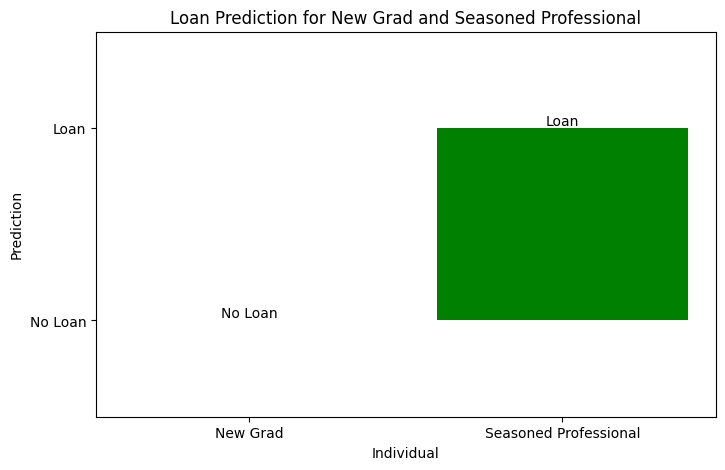

In [43]:
#(d)Consider using visualization (code is allowed) to convey your findings intuitively

#Visualization

# Define labels for the two data points
labels = ['New Grad', 'Seasoned Professional']

# Define the possible predictions
predictions = ['No Loan', 'Loan']  # Assuming binary classification where 0 = No Loan, 1 = Loan

# Convert the numerical predictions to human-readable labels
predicted_labels = [predictions[pred] for pred in svm_predictions_new]

# Create a new figure for the bar plot with a specified size
plt.figure(figsize=(8, 5))

# Plot the predictions as a bar plot
plt.bar(labels, svm_predictions_new, color=['blue', 'green'])

# Set the label for the x-axis
plt.xlabel('Individual')

# Set the label for the y-axis
plt.ylabel('Prediction')

# Set the title of the plot
plt.title('Loan Prediction for New Grad and Seasoned Professional')

# Customize the x-ticks to display the labels for each individual
plt.xticks(ticks=range(len(labels)), labels=labels)

# Set the limits for the y-axis to clearly show binary outcomes
plt.ylim(-0.5, 1.5)  # Adjust y-axis to clearly show binary outcomes


# Customize the y-ticks to display the human-readable predictions
plt.yticks(ticks=[0, 1], labels=predictions)

# Add text annotations to the bars to show the prediction labels
for i in range(len(labels)):
    plt.text(i, svm_predictions_new[i], predicted_labels[i], ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
#(b)Asserts your findings clearly
#New Grad: The bar plot for "New Grad" shows a value of 0, corresponding to the "No Loan" prediction. This means the model predicts that the new graduate is not likely to be approved for a loan.
#Seasoned Professional: The bar plot for "Seasoned Professional" shows a value of 1, corresponding to the "Loan" prediction. This indicates that the model predicts the seasoned professional is
#likely to be approved for a loan.

In [ ]:
#(c)Provides quantitative evidence or reasoning to support your claims.
#The evidence from the bar plot (with values 0 and 1) supports the claims about the model's predictions. The visualization ensures that the binary nature of the predictions is
#clearly displayed, making it easy to understand the model's decision for the new graduate is not likely to be approved for a loan and the seasoned professional is
#likely to be approved for a loan.